## WP2 Intro

[sisclab2022-project6](https://iffmd.fz-juelich.de/RhXA4J_JTwebjYKG35TbuQ#), [meeting 06](https://iffmd.fz-juelich.de/RhXA4J_JTwebjYKG35TbuQ#Meeting-06-December-2022).

Intro to **WP2 Learning the exchange interaction $J_{ij}$ with Feature Engineering**.

**==>> The section "Better coding" below presents the function `sisclab22p6.data.load_jij_data()`. Use that function to load the data into your own noteebooks. <<==**

You find the initial data for WP2 under `/data/jij/`.

The input data are the 1730 impurity cluster structures in the `.extxyz` file. We call them "dimers" because each consists of *two* defect atoms embedded into the topological insulator $Bi_2Te_3$. This material is a layered material. You can see visualizations in the thesis by Rubel Mozumder, which you find in [our project's sciebo folder](https://iffmd.fz-juelich.de/RhXA4J_JTwebjYKG35TbuQ?both#Infrastructure) under `sisclab2022-project6-cloud/2022-12-15_meeting06/`, chapter 7, Figure 16. The defect atoms substitute different atoms in this crystal. There are three kinds of variations which produce the 1730 different variations on this general theme:

- variation of the chemical species of the defect atoms. All defect atoms are [transition metals](https://ptable.com/) from the [first two series](https://en.wikipedia.org/wiki/Transition_metal#Electronic_configuration), the (3d) d-block Series (Sc–Zn), and the (4d) d-block Series (Y–Cd).
- variation of the intra-layer distance between the two defect atoms
- variation in the $Bi_2Te3$ layer into which the defect atom is substituted

This can be translated into a naming scheme. In the `.extxyz` file you'll see for example that each a structure has an annotation like `workchain_label=Cr:Cd:Bi2Te3_il_3_4_Off_1`. This means that the defect atoms in this structure are Chromium and Cadmium, the `il_3_4` mean that they ... *TBD, consult with Philipp*, and the `off_1` that they *TBD, consult with Philipp*.

The same information is also in the `.csv` table.

## Imports

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import ase
import ase.io
import ase.visualize

In [2]:
# static matplotlib plots; boring, but works always
%matplotlib inline
# for interactive mtplotlib plots, use %matplotlib widget instead; not installed

## Load data

In [3]:
filepath = Path("../../data/jij")
filename_table = "d_block_magnetic_data_modified.csv"
filename_structures = "dimer_clusters.extxyz"

In [4]:
table = pd.read_csv(filepath / filename_table)
structures = ase.io.read(filepath / filename_structures, index=':', format='extxyz')

In [5]:
print(f"Number samples: {len(structures)}, {table.shape[0]}.")

Number samples: 1730, 1730.


In [6]:
table.head()

calc_imps                           J_data_uuid  imp0  offset0  ilayer0  \
0          2  9ec53578-777c-4884-a3a7-084ad3586748    21        0        3   
1          2  b218302c-a882-46f3-b4d7-e148d9f1cb0b    21        0        3   
2          2  19f51d50-b554-4eb1-b106-a9e78a1831f4    21        0        3   
3          2  93cdd1c9-1cb4-4674-aefd-f427f7d23ef8    25        0        3   
4          2  de909ef1-e7c6-4566-b585-1c0d3f072f40    24        0        3   

   imp1  offset1  ilayer1  i  j  ...            Dx            Dy  \
0    22        1        3  0  1  ... -3.343143e-04 -2.023023e-03   
1    39        1        3  0  1  ... -7.543443e-23  2.180498e-22   
2    21        1        3  0  1  ... -1.103540e-22  9.714628e-22   
3    21        1        3  0  1  ... -1.338714e-03 -3.601755e-03   
4    21        1        3  0  1  ...  2.688623e-04 -2.057022e-02   

             Dz        rx   ry   rz         r          mom1          mom2  \
0 -2.125044e-03 -0.418515  0.0  0.0  0.418515  1.856702e-06  8.152756e-01   
1  2.746224e-22 -0.418515  0.0  0.0  0.418515 -4.173850e-11 -3.308398e-11   
2  9.783230e-22 -0.418515  0.0  0.0  0.418515 -4.285949e-11 -4.675482e-11   
3 -7.350645e-03 -0.418515  0.0  0.0  0.418515  4.409489e+00  1.069743e-02   
4 -1.688515e-02 -0.418515  0.0  0.0  0.418515  3.815394e+00  4.514470e-03   

        tot_mom  
0  8.152775e-01  
1 -7.482248e-11  
2 -8.961432e-11  
3  4.420186e+00  
4  3.819909e+00  

[5 rows x 24 columns]

The columns `['imp0', 'imp1', 'ilayer0', 'ilayer1', 'offset1']` hold the same information for each structure as the `workchain_label` in the `.extxyz` file.

In [7]:
table[['J_data_uuid', 'imp0', 'imp1', 'ilayer0', 'ilayer1', 'offset1']].head()

J_data_uuid  imp0  imp1  ilayer0  ilayer1  offset1
0  9ec53578-777c-4884-a3a7-084ad3586748    21    22        3        3        1
1  b218302c-a882-46f3-b4d7-e148d9f1cb0b    21    39        3        3        1
2  19f51d50-b554-4eb1-b106-a9e78a1831f4    21    21        3        3        1
3  93cdd1c9-1cb4-4674-aefd-f427f7d23ef8    25    21        3        3        1
4  de909ef1-e7c6-4566-b585-1c0d3f072f40    24    21        3        3        1

For example, let's look at the first sample. It's `uuid` is `9ec53578-777c-4884-a3a7-084ad3586748`. How do we find the corresponding structure? Each structure has an `info` attribute which provides the link between table rows and structures.

In [8]:
structures[0].info

{'workchain_uuid': '7412f87c-9c66-4ba8-8b51-a37843d13ef0',
 'workchain_label': 'Sc:Ti:Bi2Te3_il_3_3_Off_1',
 'workchain_ctime': '2021-03-25 10:01:49.892672+00:00',
 'jij_uuid': '9ec53578-777c-4884-a3a7-084ad3586748',
 'Rcut_at_site_0': 4.0,
 'Rcut_at_site_7': 4.0,
 'Rcut_unit': 'Angstrom'}

This is not the one we are looking for. Let's find it.

In [9]:
structure = [struc for struc in structures if struc.info['jij_uuid'] == '9ec53578-777c-4884-a3a7-084ad3586748'][0]
structure.info

{'workchain_uuid': '7412f87c-9c66-4ba8-8b51-a37843d13ef0',
 'workchain_label': 'Sc:Ti:Bi2Te3_il_3_3_Off_1',
 'workchain_ctime': '2021-03-25 10:01:49.892672+00:00',
 'jij_uuid': '9ec53578-777c-4884-a3a7-084ad3586748',
 'Rcut_at_site_0': 4.0,
 'Rcut_at_site_7': 4.0,
 'Rcut_unit': 'Angstrom'}

Bingo!

The label `'Sc:Ti:Bi2Te3_il_3_3_Off_1'` corresponds to the table entries `21 	22 	3 	3 	1` above. The first two are the atomic numbrs of the defect atoms.

Let's visualize it.

In [10]:
ase.visualize.view(structure, viewer='x3d')

So, two defect atoms (looking identical here, but two different elements) in the $Bi$ layer of $Bi_2Te_3$, sandwhiched by two $Te$ layers.

## Rearrange all data into one "nice" table

But this data access pattern is not very convenient. Let's turn the structures list also into a table.

Pandas can turn a list of dicts into a table with `pd.DataFrame.from_dict()`. For that, we will first pull out the `.info` from the `ase.Atoms` objects, then insert the `ase.Atoms` object as another element in each dictionary, then convert to table. Pandas dataframe columns can also store complex objects like numpy arrays and `ase.Atoms`. (at least when used in-memory).

We can then even merge or "join" the two tables into one, since we have a column common, the `jij_uuid` / `J_data_uuid`. That will make [data access via pandas](https://pandas.pydata.org/docs/getting_started/index.html) much easier.

Afterwards, we can free up memory by deleting unneeded variables using `del`. Note though that afterwards, running previous notebook cells will not work anymore, unless you start from the beginning. A workaround to this is putting everything inside a function and only returning what you need. All other temporary variables will be removed from memory when the function exits.

In [11]:
# turn structures list into pandas table using their .info dicts
structures_table = [struc.info for struc in structures]
for info, structure in zip(structures_table, structures):
    structure.info = {}
    info['structure'] = structure

structures_table = pd.DataFrame.from_dict(structures_table)

In [12]:
# merge both tables on column for jij uuids
# we check first if this operation has been done already. this ensures that the notebook cell order execution does not matter.
if 'structures' in locals():
    table = pd.merge(structures_table, table, 
                     left_on='jij_uuid', right_on='J_data_uuid', 
                     how='left').drop('J_data_uuid', axis=1)
    
    try:
        del structures, structures_table
    except NameError as err:
        pass
else:
    print("Tables have already been merged once.")

In [13]:
table.head()

workchain_uuid            workchain_label  \
0  7412f87c-9c66-4ba8-8b51-a37843d13ef0  Sc:Ti:Bi2Te3_il_3_3_Off_1   
1  6cccffa5-d780-4c51-a486-f5c1589ed0d6   Sc:Y:Bi2Te3_il_3_3_Off_1   
2  34ca108e-aed1-414f-9ef8-4a95d33da1cc  Sc:Sc:Bi2Te3_il_3_3_Off_1   
3  9c7d1145-d333-4afe-b146-8eb0c6890d67  Mn:Sc:Bi2Te3_il_3_3_Off_1   
4  2a0ee2ca-d96a-4e9f-8dbd-51f88e50bdc3  Cr:Sc:Bi2Te3_il_3_3_Off_1   

                    workchain_ctime                              jij_uuid  \
0  2021-03-25 10:01:49.892672+00:00  9ec53578-777c-4884-a3a7-084ad3586748   
1  2021-03-31 09:04:52.727559+00:00  b218302c-a882-46f3-b4d7-e148d9f1cb0b   
2  2021-03-31 09:04:50.250319+00:00  19f51d50-b554-4eb1-b106-a9e78a1831f4   
3  2021-03-31 09:05:12.335497+00:00  93cdd1c9-1cb4-4674-aefd-f427f7d23ef8   
4  2021-03-31 09:05:06.833852+00:00  de909ef1-e7c6-4566-b585-1c0d3f072f40   

   Rcut_at_site_0  Rcut_at_site_7 Rcut_unit  \
0             4.0             4.0  Angstrom   
1             4.0             4.0  Angstrom   
2             4.0             4.0  Angstrom   
3             4.0             4.0  Angstrom   
4             4.0             4.0  Angstrom   

                                           structure  calc_imps  imp0  ...  \
0  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...          2    21  ...   
1  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...          2    21  ...   
2  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...          2    21  ...   
3  (Atom('Mn', [0.0, 0.0, 0.0], mass=54.938045, i...          2    25  ...   
4  (Atom('Cr', [0.0, 0.0, 0.0], mass=51.9961, ind...          2    24  ...   

             Dx            Dy            Dz        rx   ry   rz         r  \
0 -3.343143e-04 -2.023023e-03 -2.125044e-03 -0.418515  0.0  0.0  0.418515   
1 -7.543443e-23  2.180498e-22  2.746224e-22 -0.418515  0.0  0.0  0.418515   
2 -1.103540e-22  9.714628e-22  9.783230e-22 -0.418515  0.0  0.0  0.418515   
3 -1.338714e-03 -3.601755e-03 -7.350645e-03 -0.418515  0.0  0.0  0.418515   
4  2.688623e-04 -2.057022e-02 -1.688515e-02 -0.418515  0.0  0.0  0.418515   

           mom1          mom2       tot_mom  
0  1.856702e-06  8.152756e-01  8.152775e-01  
1 -4.173850e-11 -3.308398e-11 -7.482248e-11  
2 -4.285949e-11 -4.675482e-11 -8.961432e-11  
3  4.409489e+00  1.069743e-02  4.420186e+00  
4  3.815394e+00  4.514470e-03  3.819909e+00  

[5 rows x 31 columns]

Let's optimize the table a bit for easier use.

- Remove useless or redundant columns. Keep one UUID identifier from the original DB source, though.
  - `workchain_uuid` not needed, `jij_uuid` is enough (one can check uniqueness with `table.duplicated()`)
  - calculation history info not needed, `workchain_ctime`, `calc_imps`
  - redundant: `imp0` == `Z_i`, `imp1` == `Z_j` (check with `table[col1].equals(table[col2])`)
  - redundant: `i` == 0, `j` == 1 always (check with `table[col].unique()`)
- Reorder column order for easier readability.

In [14]:
# try-except: only do this once
try:
    # remove useless / redundant columns
    table.drop(columns=['workchain_uuid', 'workchain_ctime', 'calc_imps', 'Z_i', 'Z_j', 'i', 'j'], 
               inplace=True)

    # reorder columns
    table = table[
        ['workchain_label',               
         'imp0', 'imp1', 'ilayer0', 'ilayer1', 'offset0', 'offset1', 
         'structure', 
         'J', 'D', 'Dx', 'Dy', 'Dz', 
         'rx', 'ry', 'rz', 'r', 
         'mom1', 'mom2', 'tot_mom', 
         'jij_uuid']
    ]
except KeyError as err:
    print(f"Table has already been pruned and reordered once. (Error: {err})")

table.head()

workchain_label  imp0  imp1  ilayer0  ilayer1  offset0  offset1  \
0  Sc:Ti:Bi2Te3_il_3_3_Off_1    21    22        3        3        0        1   
1   Sc:Y:Bi2Te3_il_3_3_Off_1    21    39        3        3        0        1   
2  Sc:Sc:Bi2Te3_il_3_3_Off_1    21    21        3        3        0        1   
3  Mn:Sc:Bi2Te3_il_3_3_Off_1    25    21        3        3        0        1   
4  Cr:Sc:Bi2Te3_il_3_3_Off_1    24    21        3        3        0        1   

                                           structure             J  \
0  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...  1.242709e-02   
1  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i... -2.337413e-21   
2  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i... -5.764835e-21   
3  (Atom('Mn', [0.0, 0.0, 0.0], mass=54.938045, i...  8.237921e-02   
4  (Atom('Cr', [0.0, 0.0, 0.0], mass=51.9961, ind...  3.978618e-02   

              D  ...            Dy            Dz        rx   ry   rz  \
0  2.952999e-03  ... -2.023023e-03 -2.125044e-03 -0.418515  0.0  0.0   
1  3.586830e-22  ...  2.180498e-22  2.746224e-22 -0.418515  0.0  0.0   
2  1.383125e-21  ...  9.714628e-22  9.783230e-22 -0.418515  0.0  0.0   
3  8.294382e-03  ... -3.601755e-03 -7.350645e-03 -0.418515  0.0  0.0   
4  2.661418e-02  ... -2.057022e-02 -1.688515e-02 -0.418515  0.0  0.0   

          r          mom1          mom2       tot_mom  \
0  0.418515  1.856702e-06  8.152756e-01  8.152775e-01   
1  0.418515 -4.173850e-11 -3.308398e-11 -7.482248e-11   
2  0.418515 -4.285949e-11 -4.675482e-11 -8.961432e-11   
3  0.418515  4.409489e+00  1.069743e-02  4.420186e+00   
4  0.418515  3.815394e+00  4.514470e-03  3.819909e+00   

                               jij_uuid  
0  9ec53578-777c-4884-a3a7-084ad3586748  
1  b218302c-a882-46f3-b4d7-e148d9f1cb0b  
2  19f51d50-b554-4eb1-b106-a9e78a1831f4  
3  93cdd1c9-1cb4-4674-aefd-f427f7d23ef8  
4  de909ef1-e7c6-4566-b585-1c0d3f072f40  

[5 rows x 21 columns]

Let's find our initial `structure` here again.

In [15]:
table[table['workchain_label'] == 'Sc:Ti:Bi2Te3_il_3_3_Off_1']

workchain_label  imp0  imp1  ilayer0  ilayer1  offset0  offset1  \
0   Sc:Ti:Bi2Te3_il_3_3_Off_1    21    22        3        3        0        1   
19  Sc:Ti:Bi2Te3_il_3_3_Off_1    21    22        3        3        0        1   

                                            structure         J         D  \
0   (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...  0.012427  0.002953   
19  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...  0.012427  0.002953   

    ...        Dy        Dz        rx   ry   rz         r      mom1      mom2  \
0   ... -0.002023 -0.002125 -0.418515  0.0  0.0  0.418515  0.000002  0.815276   
19  ... -0.002023 -0.002125 -0.418515  0.0  0.0  0.418515  0.000002  0.815276   

     tot_mom                              jij_uuid  
0   0.815277  9ec53578-777c-4884-a3a7-084ad3586748  
19  0.815277  5c5cff9f-f037-4ab2-ad48-f4ce3743c3df  

[2 rows x 21 columns]

Aha! We see that we should *not* use `work_chain_label` as unique identifier. There are duplicates!

In [16]:
# check if column has any duplicate entries
any(table['workchain_label'].duplicated())

True

In [17]:
# show all duplicated entries in column "workchain_label"
labels = table["workchain_label"]
table[labels.isin(labels[labels.duplicated()])]

workchain_label  imp0  imp1  ilayer0  ilayer1  offset0  \
0     Sc:Ti:Bi2Te3_il_3_3_Off_1    21    22        3        3        0   
19    Sc:Ti:Bi2Te3_il_3_3_Off_1    21    22        3        3        0   
1201  Sc:Sc:Bi2Te3_il_3_4_Off_2    21    21        3        4        0   
1202  Sc:Sc:Bi2Te3_il_3_4_Off_2    21    21        3        4        0   

      offset1                                          structure  \
0           1  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...   
19          1  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...   
1201        2  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...   
1202        2  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...   

                 J             D  ...            Dy            Dz        rx  \
0     1.242709e-02  2.952999e-03  ... -2.023023e-03 -2.125044e-03 -0.418515   
19    1.242709e-02  2.952999e-03  ... -2.023023e-03 -2.125044e-03 -0.418515   
1201  2.575172e-23  7.535775e-23  ...  3.758002e-23  2.887349e-24 -0.418515   
1202  2.575172e-23  7.535775e-23  ...  3.758002e-23  2.887349e-24 -0.418515   

       ry        rz         r          mom1          mom2       tot_mom  \
0     0.0  0.000000  0.418515  1.856702e-06  8.152756e-01  8.152775e-01   
19    0.0  0.000000  0.418515  1.856702e-06  8.152756e-01  8.152775e-01   
1201  0.0  0.582221  0.717033 -2.631240e-11  4.161227e-12 -2.215117e-11   
1202  0.0  0.582221  0.717033 -2.631240e-11  4.161227e-12 -2.215117e-11   

                                  jij_uuid  
0     9ec53578-777c-4884-a3a7-084ad3586748  
19    5c5cff9f-f037-4ab2-ad48-f4ce3743c3df  
1201  c9ba2979-f836-49dd-ad7c-76b8161b4508  
1202  aa992674-7ccc-4ff9-bafd-d7d03e377eab  

[4 rows x 21 columns]

Whereas, the UUID column `jij_uuid` has no duplicates.

In [18]:
# check if column has any duplicate entries
any(table['jij_uuid'].duplicated())

False

Next step: drop the duplicates.

## Better coding: From notebooks to reusable modules

Okay, we loaded the dataset and made a nice table out of it.

What if you want to reuse that in another notebook? You have to copy-paste the cells. Soon you have multiple copies of the code.

What if you want to improve it? You improve the current version. Soon you have multiple different versions in different notebooks, and lose track of which is the current one.

A better way is to move the data-loading code into a **Python package**. Now you have one central version, and no clutter in your notebooks.

In [19]:
# ipython magic autoreload for code development: 
# makes code changes in any imported code available instantly.
# avoid having to restart the notebook kernel.
%load_ext autoreload
%autoreload 2

Here are two different approaches to make our project's package `sisclab22p6` importable. The first one is hard-coded to the location of this specific notebook. The second one works without adjustment from anywhere inside the project folder.

In [20]:
# make project package importable, hardcoded to current folder level of this specific notebook. 
# Add more `.parent` or remove when called from a different level.
import sys
project_path = str(Path.cwd().parent.parent)
if project_path not in sys.path:
    sys.path.append(project_path)

The following function allows us to load package `sisclab22p6` from our project. You can reuse this function in any of your projects by just copy-pasting the cell, and adjusting the package name.

In [21]:
# make project importable, independent of current folder level.
def load_local_project_package(project_package_name:str):
    """Make package of current project importable.
    
    A function for local package development. Assume you call this from a notebook somewhere in your project folder. 
    It searches upwards through the folder until it finds the project root folder. That is the folder which contains 
    the package folder of this project. It then puts the project folder on `sys.path`.
    
    Afterwards, you can call "import project_package_name", and use the package.
    
    The advantage of this function is that it makes loading of the package independent from where it is called.
    
    Args:
        project_package_name: Name of the package (folder) of the current project.
    """
    import sys
    from pathlib import Path
    current_path = Path.cwd()
    current_path_and_parents = [current_path] + list(current_path.parents)
    
    # find the project folder (the one holding the package folder) from the current path upwards
    search_results = [path for path in current_path_and_parents 
                      if any(p.name == project_package_name for p in path.iterdir())]
    try: 
        project_path = search_results[0]
        if str(project_path) not in sys.path:
            sys.path.append(str(project_path))
        print(f"Successfully loaded package '{project_package_name}' from project '{project_path.name}'. You can now import the package.")
    except IndexError as err:
        raise IndexError(f"{project_package_name=} not found in any parent path of {current_path=}.") from err
        
load_local_project_package('sisclab22p6')        

Successfully loaded package 'sisclab22p6' from project 'sisclab2022-project6-git'. You can now import the package.


In [22]:
import sisclab22p6.data

Now we can use the package to load our jij data in a oneliner.

In [23]:
filepath_data = "../../data/jij"
filename_table = "d_block_magnetic_data_modified.csv"
filename_structures = "dimer_clusters.extxyz"

In [24]:
table = sisclab22p6.data.load_jij_data(filepath = filepath_data, 
                                       filename_table=filename_table, 
                                       filename_structures=filename_structures)

Loaded Number samples: 1730, 1730.


In [28]:
table.head()

workchain_label  imp0  imp1  ilayer0  ilayer1  offset0  offset1  \
0  Sc:Ti:Bi2Te3_il_3_3_Off_1    21    22        3        3        0        1   
1   Sc:Y:Bi2Te3_il_3_3_Off_1    21    39        3        3        0        1   
2  Sc:Sc:Bi2Te3_il_3_3_Off_1    21    21        3        3        0        1   
3  Mn:Sc:Bi2Te3_il_3_3_Off_1    25    21        3        3        0        1   
4  Cr:Sc:Bi2Te3_il_3_3_Off_1    24    21        3        3        0        1   

                                           structure             J  \
0  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...  1.242709e-02   
1  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i... -2.337413e-21   
2  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i... -5.764835e-21   
3  (Atom('Mn', [0.0, 0.0, 0.0], mass=54.938045, i...  8.237921e-02   
4  (Atom('Cr', [0.0, 0.0, 0.0], mass=51.9961, ind...  3.978618e-02   

              D  ...  KKR_rcut1  KKR_rcut_unit        rx   ry   rz         r  \
0  2.952999e-03  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
1  3.586830e-22  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
2  1.383125e-21  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
3  8.294382e-03  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
4  2.661418e-02  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   

           mom1          mom2       tot_mom  \
0  1.856702e-06  8.152756e-01  8.152775e-01   
1 -4.173850e-11 -3.308398e-11 -7.482248e-11   
2 -4.285949e-11 -4.675482e-11 -8.961432e-11   
3  4.409489e+00  1.069743e-02  4.420186e+00   
4  3.815394e+00  4.514470e-03  3.819909e+00   

                               jij_uuid  
0  9ec53578-777c-4884-a3a7-084ad3586748  
1  b218302c-a882-46f3-b4d7-e148d9f1cb0b  
2  19f51d50-b554-4eb1-b106-a9e78a1831f4  
3  93cdd1c9-1cb4-4674-aefd-f427f7d23ef8  
4  de909ef1-e7c6-4566-b585-1c0d3f072f40  

[5 rows x 24 columns]

## Data exploration

### General

Explore the table, draw histograms, use pandas and pandas plotting.

### Chemical elements

Let's visualize the chemical elements in the dataset in a periodic table. We will use [mendeleev](https://mendeleev.readthedocs.io) for that. But `mendeleev` does not support plotting random sets of elements highlighted in a periodic table. Luckily, `masci-tools` `ChemicalElements` does.

In [26]:
# How many impurity chemical elements are there?
len(table['imp0'].unique())

20

In [27]:
# Are there different elements used for the first and second impurity?
set(table['imp0']).symmetric_difference(table['imp1'])

set()

Loading BokehJS ...

Will write HTML table plot to file img/periodic-table.html. 


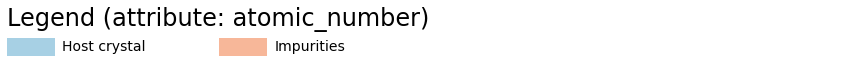

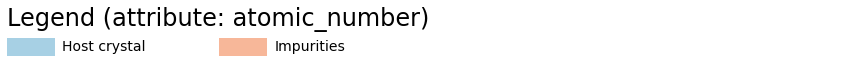

In [33]:
# Plot the chemical elements in a mendeleev periodic table.
# You might need to update masci_tools first for this.
# In a terminal, do `cd /opt/masci-tools; sudo git pull origin develop`.
from masci_tools.util.chemical_elements import ChemicalElements

elements = ChemicalElements(groups=['Host crystal', 'Impurities'])

elements.add_elements(elements= ['Bi', 'Te'], 
                      group_name='Host crystal')
elements.add_elements(elements = [int(atomic_number) for atomic_number in table['imp0'].unique()], 
                      group_name='Impurities')

elements.plot(title="Transition metal impurities in Bi2Te3",
              attribute='atomic_number',
              with_legend=True,
              output='img/periodic-table.html')

## Initial tasks

**The initial tasks for WP2 can be found in the [Meeting06 notes](https://iffmd.fz-juelich.de/RhXA4J_JTwebjYKG35TbuQ?both#Meeting-06-December-2022).**

Side note: The other structure `info` annotations about `workchain` come from the fact that this dataset was created with the computational workflow engine [AiiDA](https://www.aiida.net/), specifically with the plugin [AiiDA-KKR](https://aiida-kkr.readthedocs.io), developed by our group at FZ Jülich. In this framework, each calculation is a workflow, stored as a [graph](https://www.aiida.net/sections/graph_gallery.html), where calculations, inputs and outputs, and even the computers they ran on, are stored as nodes in the graph, connected by edges. This ensures that not only the results of a calculation, but also the complete process can be stored and investigated. This is what we call "data provenance".

Even though AiiDA and AiiDA-KKR are installed on iffAiiDA, you only get an export of the raw data, because a) the database of this dataset is several GB large, and the b) the learning curve of AiiDA is to steep for this project. You can see, though, [here](https://iffgit.fz-juelich.de/phd-project-wasmer/projects/mozumders-dimer-database/-/blob/master/notebooks/inspect_mozumders_ML_notebooks/search_db_for_ML_inputs.ipynb), how the data that you get was exported from the AiiDA database.